Importing libs

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
from scipy.stats import expon


In [26]:
def chi_squared_test(random_numbers, num_bins, alpha, lam):
    observed_frequencies = np.histogram(random_numbers, bins=num_bins, density=True)[0]
    x = np.linspace(0, 10, 50)
    expected_frequency = expon.pdf(x, scale=1/lam)
    chi_squared_statistic = np.sum((observed_frequencies - expected_frequency) ** 2 / expected_frequency)
    
    degrees_of_freedom = num_bins - 1
    chi_squared_critical = chi2.ppf(1 - alpha, degrees_of_freedom)
    
    return chi_squared_statistic, chi_squared_critical

define paremetrs

In [27]:
lambda_values = [0.5, 1.0, 1.5, 2.0, 2.5]
num_samples = 10000
alpha = 0.05
num_bins=50

define function for building plot

[0.92753919 0.0659055  0.68285857 ... 0.63665686 0.39819943 0.61265157]
Для λ = 0.5:
Середнє: 2.019687973815098
Дисперсія: 3.996895958129671
Статистика Chi-squared: 1.1551309481219547
Критичне значення Chi-squared: 66.3386488629688
Нульову гіпотезу не відхиляємо (розподіл відповідає)
---


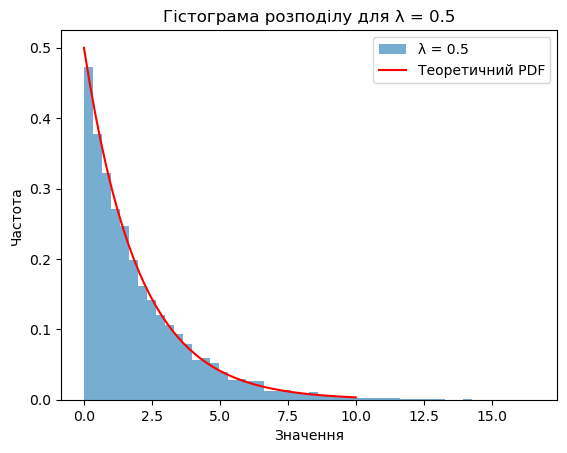

[0.10304598 0.61945545 0.52667093 ... 0.26095184 0.77012393 0.58379947]
Для λ = 1.0:
Середнє: 1.0132625514014912
Дисперсія: 1.0055196608255998
Статистика Chi-squared: 1.0526251228549266
Критичне значення Chi-squared: 66.3386488629688
Нульову гіпотезу не відхиляємо (розподіл відповідає)
---


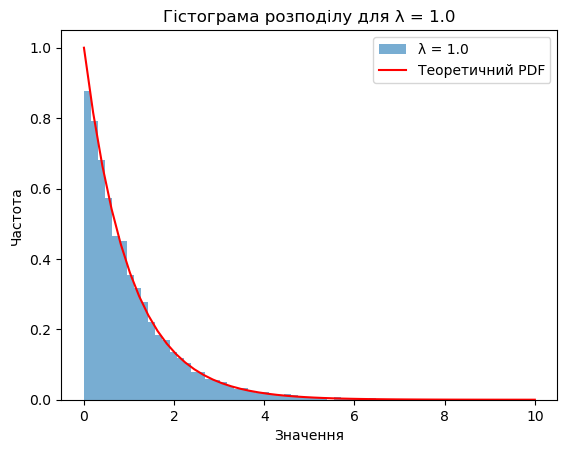

[0.94558387 0.89251911 0.15017275 ... 0.50827413 0.37451218 0.03693549]
Для λ = 1.5:
Середнє: 0.6625424573164999
Дисперсія: 0.44169787520060844
Статистика Chi-squared: 2.0117568628676423
Критичне значення Chi-squared: 66.3386488629688
Нульову гіпотезу не відхиляємо (розподіл відповідає)
---


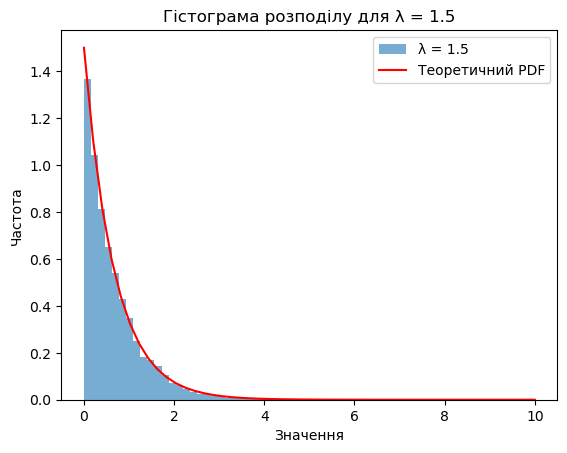

[0.70306293 0.6826978  0.57361093 ... 0.14569212 0.57027129 0.07703714]
Для λ = 2.0:
Середнє: 0.4920003636654938
Дисперсія: 0.2356028240166319
Статистика Chi-squared: 2383.7166292688967
Критичне значення Chi-squared: 66.3386488629688
Нульову гіпотезу відхиляємо (розподіл не відповідає)
---


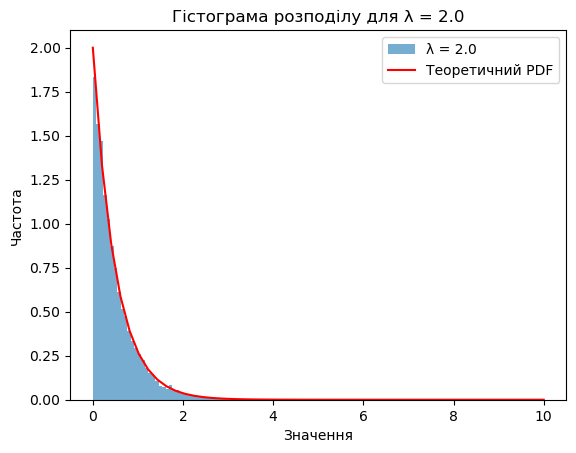

[0.85509906 0.70527937 0.12267958 ... 0.06696808 0.52043933 0.0513604 ]
Для λ = 2.5:
Середнє: 0.3929887062215747
Дисперсія: 0.1510473034041041
Статистика Chi-squared: 52899.597583478775
Критичне значення Chi-squared: 66.3386488629688
Нульову гіпотезу відхиляємо (розподіл не відповідає)
---


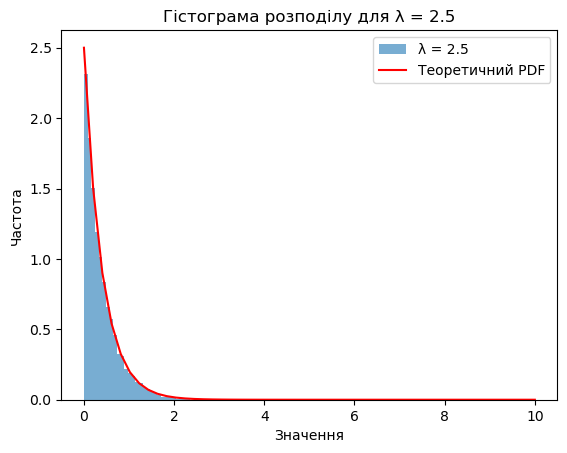

In [28]:
for lam in lambda_values:
    # Генерація випадкових чисел Xi(i) з рівномірним розподілом на інтервалі (0, 1)
    random_numbers = np.random.rand(num_samples)
    print(random_numbers)

    # Застосування формули для отримання випадкових чисел з експоненційним розподілом
    random_exp_numbers = - (1 / lam) * np.log(random_numbers)

    chi_squared_statistic, chi_squared_critical = chi_squared_test(random_exp_numbers, num_bins, alpha, lam)
    # Побудова гістограми
    plt.hist(random_exp_numbers, bins=num_bins, density=True, alpha=0.6, label=f'λ = {lam}')

    # Теоретичний розподіл експоненційного закону
    x = np.linspace(0, 10, 50)
    theoretical_pdf = expon.pdf(x, scale=1/lam)
    plt.plot(x, theoretical_pdf, 'r-', label='Теоретичний PDF')

    # Знаходження середнього і дисперсії
    mean = np.mean(random_exp_numbers)
    variance = np.var(random_exp_numbers)

    print(f'Для λ = {lam}:')
    print(f'Середнє: {mean}')
    print(f'Дисперсія: {variance}')
    print(f'Статистика Chi-squared: {chi_squared_statistic}')
    print(f'Критичне значення Chi-squared: {chi_squared_critical}')
        
    # Порівняння результатів тесту з критичним значенням
    if chi_squared_statistic <= chi_squared_critical:
        print('Нульову гіпотезу не відхиляємо (розподіл відповідає)')
    else:
        print('Нульову гіпотезу відхиляємо (розподіл не відповідає)')
        
    print('---')

    plt.legend()
    plt.title(f'Гістограма розподілу для λ = {lam}')
    plt.xlabel('Значення')
    plt.ylabel('Частота')
    plt.show()